<a href="https://colab.research.google.com/github/YazMRRS/FisicaComputacional1/blob/master/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las bibliotecas a utilizar
import numpy as np 
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt

%matplotlib inline 

**Ejercicio 1.** Defina las siguientes matrices. 

\

$$\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}$$

\

$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}$$

\

y la matriz identidad

\

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}$$

\

Calcule el resultado de $2I+3A+A@B$.


In [ ]:
#Definimos las matrices A y B
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])

#Definimos la matriz identidad
I = np.array([[1,0],[0,1]])

In [ ]:
#Resolvemos la ecuación 2I+3A+A@B
print((2*I)+(3*A)+(A@B))

[[13 17]
 [-1 35]]


**Ejercicio 2.** Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación

$$\det(M - \lambda I) = 0$$

Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como

$$P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2 $$

y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$P_3(\lambda)=\frac{1}{6}[\mathrm{tr}^3(M)+2\,\mathrm{tr}(M^3)-3\,\mathrm{tr}(M)\mathrm{tr}(M^2)]-\frac{1}{2}[\mathrm{tr}^2(M)-\mathrm{tr}(M^2)]\lambda+\mathrm{tr}(M)\lambda^2-\lambda^3$$

El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico

$$P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 $$

y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [ ]:
a = float(input())
b = float(input())
c = float(input())
d = float(input())

M = np.array([[a,b],[c,d]])
if (a*d-b*c) != 0:
  p_M = I*la.det(M)-np.trace(M)*M+mpow(M,2)
  print("El polimonio caracteristico es igual a cero.")
  print("El polinomio caracteristico calculado mediante el teorema es igual a:")
  print(p_M)
  print("Al ser la matriz cero, el teorema se demuestra")
else:
  print("El determinante es igual a cero y el teorema no aplica")

2
5
4
8
El polimonio caracteristico es igual a cero.
El polinomio caracteristico calculado mediante el teorema es igual a:
[[0. 0.]
 [0. 0.]]
Al ser la matriz cero, el teorema se demuestra


**Ejercicio 3.** Resuelva el sistema de ecuaciones

$$x-3y+z=1$$

$$3x-4y+z=5$$

$$2y-z=0$$

de dos formas, utilizando el método de eliminación gaussiana y utilizando la función scipy.linalg.solve()








In [ ]:
#Método de eliminación gaussiana
#Definimos la matriz en función de las ecuaciones y empezamos a resolver
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A
    
X=np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
X1= scale_row(X, -3, 0)
print(X1)

[[-3.  9. -3. -3.]
 [ 3. -4.  1.  5.]
 [ 0.  2. -1.  0.]]


In [ ]:
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A
    
X2=add_row(X1,1,1,0)
print(X2)

[[-3.  9. -3. -3.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [ ]:
X3=np.array([[1,-3,1,1],[0,5,-2,2],[0,2,-1,0]])
print(X3)

[[ 1 -3  1  1]
 [ 0  5 -2  2]
 [ 0  2 -1  0]]


In [ ]:
X4=scale_row(X3,-2/5,1)
print(X4)

[[ 1.  -3.   1.   1. ]
 [ 0.  -2.   0.8 -0.8]
 [ 0.   2.  -1.   0. ]]


In [ ]:
X5=add_row(X4,1,2,1)
print(X5)

[[ 1.  -3.   1.   1. ]
 [ 0.  -2.   0.8 -0.8]
 [ 0.   0.  -0.2 -0.8]]


In [ ]:
X6=np.array([[1,-3,1,1],[0,5,-2,2],[0,0,-0.2,-0.8]])
print(X6)

[[ 1.  -3.   1.   1. ]
 [ 0.   5.  -2.   2. ]
 [ 0.   0.  -0.2 -0.8]]


Tenemos que

$$x=3$$

$$y=2$$

$$z=4$$

In [ ]:
#Método por la función scipy.linalg.solve()
x1=np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
m=np.array([[1],[5],[0]])
solución=la.solve(x1,m)
print(solución)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4.** Dadas las siguientes matrices $B_1, B_2$ y $B_3$


$$\begin{equation*}
 B_1
 =
  \begin{bmatrix}
   2 & 0 & 0 \\
   0 & 3 & 4 \\
   0 & 4 & 9
   \end{bmatrix}
\end{equation*}$$

\

$$\begin{equation*}
 B_2
 =
  \begin{bmatrix}
   0 & 1 & 0 \\
   0 & 0 & 1 \\
   1 & 0 & 0
   \end{bmatrix}
\end{equation*}$$

\

$$\begin{equation*}
 B_3
 =
  \begin{bmatrix}
   2 & 0 & 0 & 0\\
   1 & 2 & 0 & 0 \\
   0 & 1 & 3 & 0 \\
   0 & 0 & 1 & 3
   \end{bmatrix}
\end{equation*}$$


Encuenta los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy,linalg.eig(), y contrasta los resultados en cada caso con los que se desarrollan en los ejemplos de la wikipedia. 

In [ ]:
#Definimos las matrices 
B1=np.array([[2,0,0],[0,3,4],[0,4,9]])
B2=np.array([[0,1,0],[0,0,1],[1,0,0]])
B3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print(B1)
print("\n",B2)
print("\n",B3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]

 [[0 1 0]
 [0 0 1]
 [1 0 0]]

 [[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
#Aplicamos la biblioteca scipy.linalg.eig()
#Matriz B1
eigevalores, eigevectores = la.eig(B1)
print('Eigevalores:', eigevalores)
print('Eigevectores:', eigevectores)

Eigevalores: [11.+0.j  1.+0.j  2.+0.j]
Eigevectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [ ]:
#Matriz B2
eigevalores, eigevectores = la.eig(B2)
print('Eigevalores:', eigevalores)
print('Eigevectores:', eigevectores)

Eigevalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigevectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


In [ ]:
#Matriz B3
eigevalores, eigevectores = la.eig(B3)
print('Eigevalores:', eigevalores)
print('Eigevectores:', eigevectores)

Eigevalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigevectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


**Ejercicio 5.** Se tienen los siguientes 8 puntos:

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


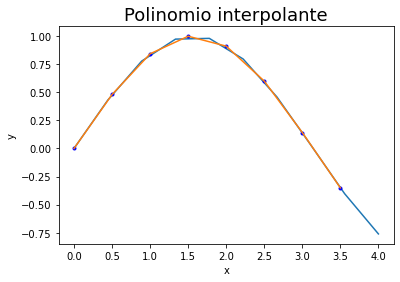

In [ ]:
# Tenemos un total de 8 puntos donde realizaremos una interpolacion con un polinomio de grado 7 donde
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

# Nuestra matriz para la variable x será
X = np.column_stack([x**k for k in range(0,8)])

## La solución para la ecuación Xa=y usando spicy.linalg==la
e = la.solve(X,y)
print(e)
# Graficamos los resultados del polinomio interpolante de coeficientes a[0], a[1], y a[2]
# Sobreponemos en la gráfica los puntos conocidos en azul con puntos ('b.')
xs = np.linspace(0,4,10)
ys_temp = 0
for n in range(0,8):
  ys = ys_temp + e[n]*xs**n
  ys_temp = ys
plt.plot(xs,ys,x,y,'b.', x, np.sin(x))
plt.title('Polinomio interpolante', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

In [ ]:
#Importamos bibliotecas
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Tomar datos del url en formato "raw"
url = 'https://raw.githubusercontent.com/YazMRRS/FisicaComputacional1/master/Actividad1/26086Diario.txt' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_trabajo = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_trabajo0 = df_trabajo.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_trabajo1 = df_trabajo0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_trabajo1[cols] = pd.to_numeric(df_trabajo0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_trabajo2 = df_trabajo1.copy()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_trabajo2['Fecha'] = pd.to_datetime(df_trabajo2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_trabajo2['Año'] = df_trabajo2['Fecha'].dt.year
df_trabajo2['Mes'] = df_trabajo2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_datos = df_trabajo2.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_datos.drop('Mes', axis=1, inplace=True)
df_datos['Mes'] = df_datos['Fecha'].dt.strftime('%b')

# Nueva copia del DataFrame para Series de Tiempo
df_datos_ts = df_datos.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_datos_ts = df_datos.set_index('Fecha')

# Seleccionaremos un conjunto de años de 30 años
df_63 = df_datos_ts[(df_datos_ts['Año'] >= 1924) & (df_datos_ts['Año'] < 1987)]

ts_test_TMX = df_63.Tmax
decomposition_TMX = sm.tsa.seasonal_decompose(ts_test_TMX.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMX = decomposition_TMX.trend
trend_TMX = trend_TMX[~np.isnan(trend_TMX)]
print(trend_TMX)

Fecha
1926-10-23    30.358630
1926-10-24    30.352603
1926-10-25    30.342192
1926-10-26    30.338082
1926-10-27    30.344110
                ...    
1985-02-26    32.573973
1985-02-27    32.580822
1985-02-28    32.579452
1985-03-01    32.572603
1985-03-02    32.568493
Name: Tmax, Length: 18621, dtype: float64


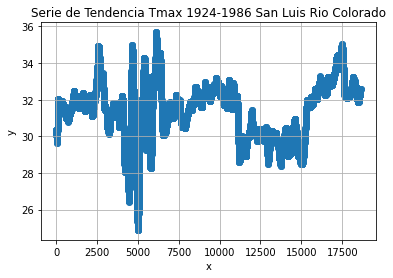

In [ ]:
N = 18621
x = np.arange(0,N)
y = trend_TMX
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmax 1924-1986 San Luis Rio Colorado')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (18621, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[3.13681521e+01 7.15287225e-06]


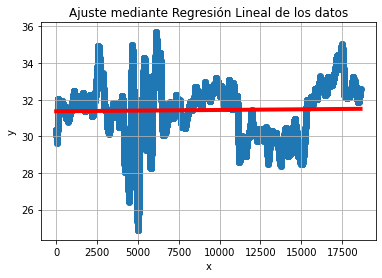

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_test_TMN = df_63.Tmin
decomposition_TMN = sm.tsa.seasonal_decompose(ts_test_TMN.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMN = decomposition_TMN.trend
trend_TMN = trend_TMN[~np.isnan(trend_TMN)]
print(trend_TMN)

Fecha
1926-10-23    12.690822
1926-10-24    12.649726
1926-10-25    12.609178
1926-10-26    12.585890
1926-10-27    12.559863
                ...    
1985-02-26    14.937808
1985-02-27    14.940548
1985-02-28    14.941918
1985-03-01    14.944658
1985-03-02    14.946027
Name: Tmin, Length: 18621, dtype: float64


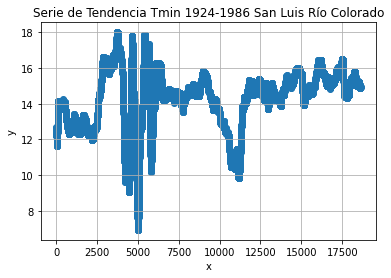

In [ ]:
N = 18621
x = np.arange(0,N)
y = trend_TMN
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmin 1924-1986 San Luis Río Colorado')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[1.34444058e+01 9.20372997e-05]


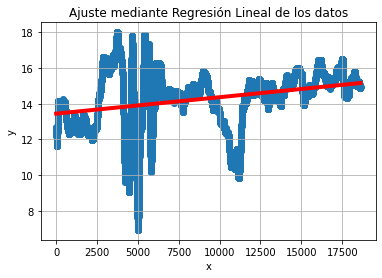

In [ ]:
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()